In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

ox.__version__

'1.6.0'

In [ ]:
neighborhood_info = {
    "Centro": "red",
    "Guadalupe": "blue",
    "Frei Rogério": "green",
    "Sagrado Coração de Jesus": "yellow",
    "São Cristóvão": "purple"
}


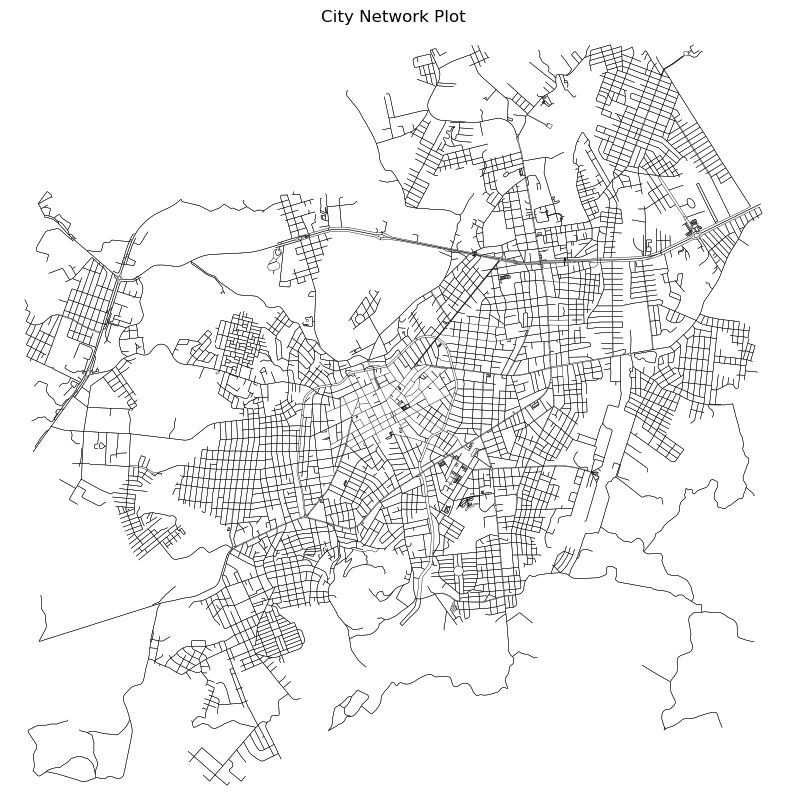

In [2]:
place_name = "Lages, Santa Catarina, Brazil"
graph = ox.graph_from_address(place_name, dist=5000, network_type="all")

fig, ax = plt.subplots(figsize=(10, 10))

ox.plot_graph(
    graph,
    node_size=0,          
    #node_color='blue',      
    edge_color='black',      
    edge_linewidth=0.3,       
    show=False,             
    close=False,            
    ax=ax,                  
)

ax.set_facecolor('white')

ax.set_title("City Network Plot")

#ax.set_xlabel("Longitude")
#ax.set_ylabel("Latitude")

plt.savefig("../mapas/cidade_vias_plot.png", dpi=300, bbox_inches='tight')

plt.show()

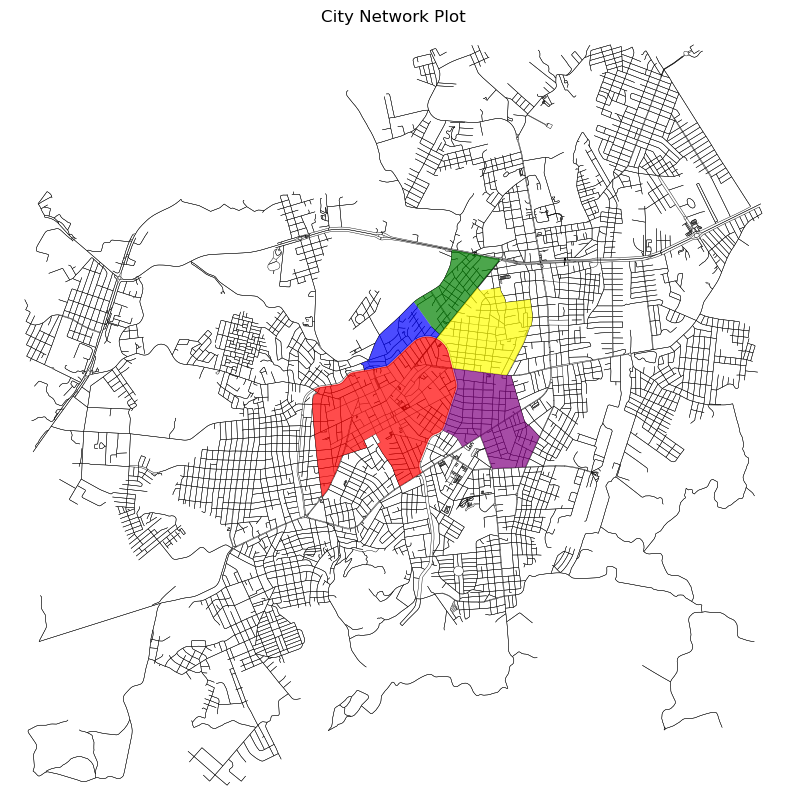

In [3]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the neighborhood information
neighborhood_info = {
    "Centro": "red",
    "Guadalupe": "blue",
    "Frei Rogério": "green",
    "Sagrado Coração de Jesus": "yellow",
    "São Cristóvão": "purple"
}

place_name = "Lages, Santa Catarina, Brazil"
graph = ox.graph_from_address(place_name, dist=5000, network_type="all")

# Create a GeoDataFrame for neighborhoods
neighborhoods_gdf = gpd.GeoDataFrame()

for name, color in neighborhood_info.items():
    neighborhood_name = f"{name}, {place_name}"
    neighborhood_gdf = ox.geocode_to_gdf(neighborhood_name)
    neighborhood_gdf["color"] = color
    
    # Append the neighborhood GeoDataFrame to the combined one
    neighborhoods_gdf = pd.concat([neighborhoods_gdf, neighborhood_gdf])

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the network
ox.plot_graph(
    graph,
    node_size=0,          
    edge_color='black',      
    edge_linewidth=0.3,       
    show=False,             
    close=False,            
    ax=ax,                  
)

# Plot the neighborhoods on top of the network
neighborhoods_gdf.plot(ax=ax, color=neighborhoods_gdf["color"], alpha=0.7)

ax.set_facecolor('white')
ax.set_title("City Network Plot")

plt.savefig("../mapas/cidade_vias_bairros.png", dpi=300, bbox_inches='tight')

plt.show()


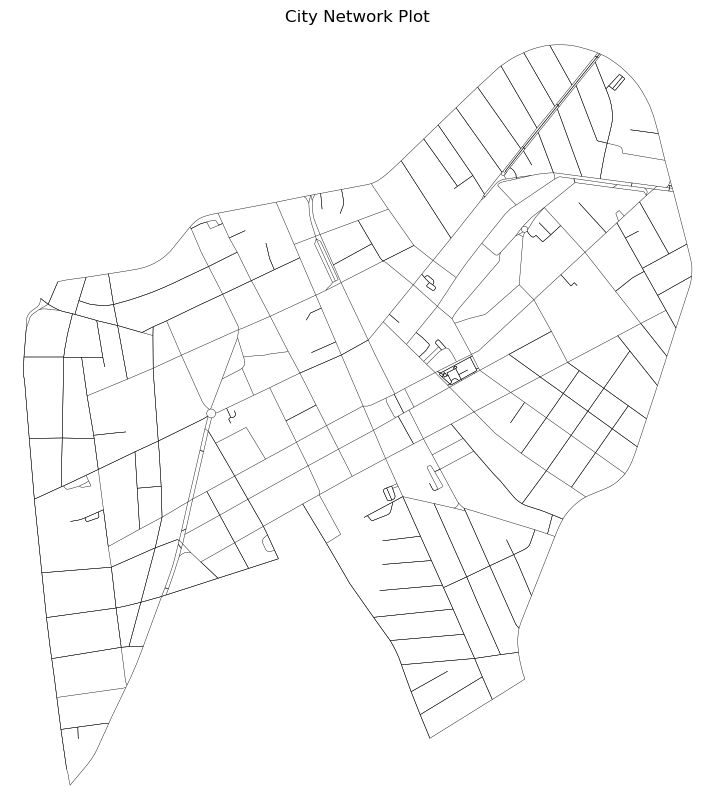

In [6]:
place_name = "Centro, Lages, Santa Catarina, Brazil"
graph = ox.graph_from_place(place_name, network_type="all")

fig, ax = plt.subplots(figsize=(10, 10))

ox.plot_graph(
    graph,
    node_size=0,          
    #node_color='blue',      
    edge_color='black',      
    edge_linewidth=0.3,       
    show=False,                         
    ax=ax,                  
)

ax.set_facecolor('white')

ax.set_title("City Network Plot")

#ax.set_xlabel("Longitude")
#ax.set_ylabel("Latitude")


plt.show()

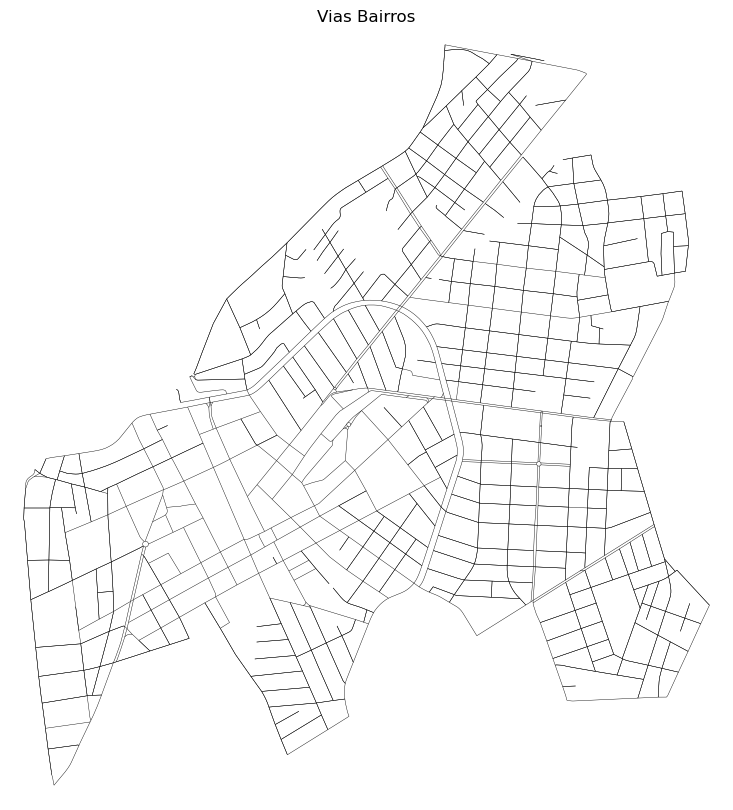

In [4]:
# create a network from multiple places
places = [
    "Centro, Lages, Santa Catarina, Brazil",
    "Guadalupe, Lages, Santa Catarina, Brazil",
    "Frei Rogério, Lages, Santa Catarina, Brazil",
    "Sagrado Coração de Jesus, Lages, Santa Catarina, Brazil",
    "São Cristóvão, Lages, Santa Catarina, Brazil"
]

# use retain_all to keep all disconnected subgraphs (e.g. if your places aren't contiguous)
graph= ox.graph_from_place(places, network_type="drive", retain_all=True)

fig, ax = plt.subplots(figsize=(10, 10))

ox.plot_graph(
    graph,
    node_size=0,          
    #node_color='blue',      
    edge_color='black',      
    edge_linewidth=0.3,       
    show=False,                         
    ax=ax,                  
)

ax.set_facecolor('white')

ax.set_title("Vias Bairros")

#ax.set_xlabel("Longitude")
#ax.set_ylabel("Latitude")

plt.savefig("../mapas/vias_bairros.png", dpi=300, bbox_inches='tight')

plt.show()
